<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Ejemplo de reducción de la dimensionalidad y clasificación mediante árboles de decisión

## 1. Carga del conjunto de datos

En primer lugar, cargaremos el conjunto de datos IRIS dataset (Más información en https://archive.ics.uci.edu/ml/datasets/iris). Éste se puede descargar de Internet o puede ser cargado directamente de la librería `scikit-learn`, que incorpora un conjunto de datasets muy conocidos y empleados para minería de datos y *machine learning*.

In [1]:
from sklearn import datasets

### Loading the Dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

## 2. Análisis exploratorio de los datos

Utilizando una librería gráfica, como por ejemplo `matplotlib` realizaremos un gráfico del histograma de valores para cada uno de los atributos, separados por los valores de clase. La finalidad es observar como se distribuye cada uno de los atributos en función del valor de clase que toman, para poder identificar de forma visual y rápida si algunos atributos permiten diferenciar de forma clara las distintas clases que forman este conjunto de datos.

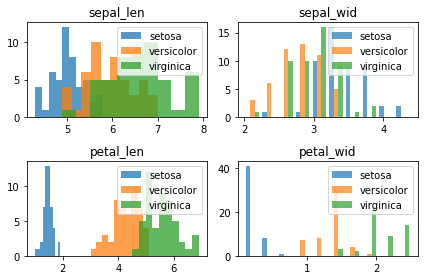

In [3]:
import matplotlib.pyplot as plt

### Exploratory Visualization
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

# sepal_len
for i, key in zip([0,1,2], target_names):
    ax0.hist(X[y==i, 0], alpha=0.75, label=key)
ax0.set_title('sepal_len')
ax0.legend(loc='upper right')

# sepal_wid
arr = []
for i in [0,1,2]:
    arr.append(X[y==i, 1])
ax1.hist(arr, alpha=0.7, label=target_names)
ax1.set_title('sepal_wid')
ax1.legend(loc='upper right')

# petal_len
for i,key in zip([0,1,2], target_names):
    ax2.hist(X[y==i, 2], alpha=0.75, label=key)

ax2.set_title('petal_len')
ax2.legend(loc='upper right')

# petal_wid
arr = []
for i in [0,1,2]:
    arr.append(X[y==i, 3])
ax3.hist(arr, alpha=0.7, label=target_names)
ax3.set_title('petal_wid')
ax3.legend(loc='upper right')

fig.tight_layout()
plt.show()

## 3. Reducción de dimensionalidad

En esta sección aplicaremos dos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con 2 dimensiones (en lugar de las 4 que tiene el conjunto original).

Podemos aplicar, entre otros:
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)

No es necesario programar los algoritmos. En este caso, haremos uso de las implementaciones disponibles en la librería `scikit-learn`.

Generaremos un gráfico (en 2D) con el resultado de cada una de los métodos de reducción de la dimensión, con el objetivo de visualizar si es posible separar eficientemente las clases objetivo empleando estos métodos de reducción de dimensionalidad.

explained variance ratio (first two components): [0.92461872 0.05306648]


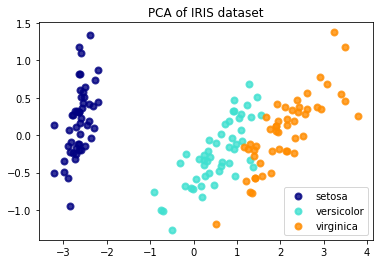

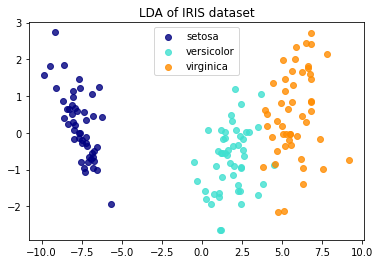

In [4]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

## 4. Aplicación de CART

En esta última parte, aplicaremos un método supervisado, concretamente utilizaremos árboles de decisión, para evaluar la precisión obtenida sobre:

- El conjunto de datos original (con 4 atributos)
- El conjunto de datos reducido (por ejemplo, con el método PCA)
- El conjunto de datos reducido (por ejemplo, con el método LDA)

Notad que es necesario que generéis un conjunto de datos de entrenamiento para calibrar el modelo, y otro conjunto de test para evaluar la bondad de cada uno de los modelos creados.

Para simplificar el ejemplo, se pide utilizar los árboles de decisión con una profundidad máxima limitada a 3 niveles.

Indicad los valores obtenidos de exactitud (*accuracy*, ACC) para cada uno de los tres modelos y la matriz de confusión asociada.

Original datasets - Accuracy is  95.55555555555556
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
PCA - Accuracy is  97.77777777777777
[[16  0  0]
 [ 0 10  1]
 [ 0  0 18]]
LDA - Accuracy is  100.0
[[16  0  0]
 [ 0 11  0]
 [ 0  0 18]]


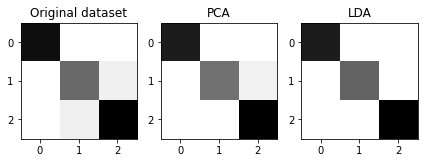

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

iris = datasets.load_iris()

# dataset slicing
X = iris.data
Y = iris.target
target_names = iris.target_names

# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)

# ORIGINAL DATASET
y_pred = clf.predict(X_test)
print("Original datasets - Accuracy is ", accuracy_score(y_test, y_pred)*100)
conf_ori = confusion_matrix(y_test, y_pred)
print(conf_ori)


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_r, Y, test_size = 0.3, random_state = 100)

clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)

# PCA
y_pred = clf.predict(X_test)
print("PCA - Accuracy is ", accuracy_score(y_test, y_pred)*100)
conf_pca = confusion_matrix(y_test, y_pred)
print(conf_pca)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, Y).transform(X)

# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_r2, Y, test_size = 0.3, random_state = 100)

clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)

# LDA
y_pred = clf.predict(X_test)
print("LDA - Accuracy is ", accuracy_score(y_test, y_pred)*100)
conf_lda = confusion_matrix(y_test, y_pred)
print(conf_lda)

### plot
fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes.flatten()

ax0.imshow(conf_ori, cmap='binary', interpolation='None')
ax0.set_title('Original dataset')

ax1.imshow(conf_pca, cmap='binary', interpolation='None')
ax1.set_title('PCA')

ax2.imshow(conf_lda, cmap='binary', interpolation='None')
ax2.set_title('LDA')

fig.tight_layout()
plt.show()